In [2]:
import pandas as pd
import numpy as np
import torch
from PIL import Image
import os
import scipy
import cv2

/home/andrei/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
import tkinter

In [4]:
image_list_clear = []
image_list_dirty = []
path = ['Images']
for file_name in os.listdir(os.path.join(*path)):
    path.append(file_name)
    img = Image.open(os.path.join(*path))
    arr = np.array(img)
    img.close()
    if file_name[:5] == 'dirty':
        image_list_dirty.append(arr)
    else:
        image_list_clear.append(arr)

    path.pop()

In [5]:
def f1(im):
    img_grey = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)

    #зададим порог
    thresh = 100

    #получим картинку, обрезанную порогом
    ret,thresh_img = cv2.threshold(img_grey, thresh, 255, cv2.THRESH_BINARY)

    #надем контуры
    contours, hierarchy = cv2.findContours(thresh_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    #создадим пустую картинку
    img_contours = np.zeros(im.shape)

    #отобразим контуры
    cv2.drawContours(img_contours, contours, -1, (255,255,255), 1)

    return img_contours.astype(np.uint8)

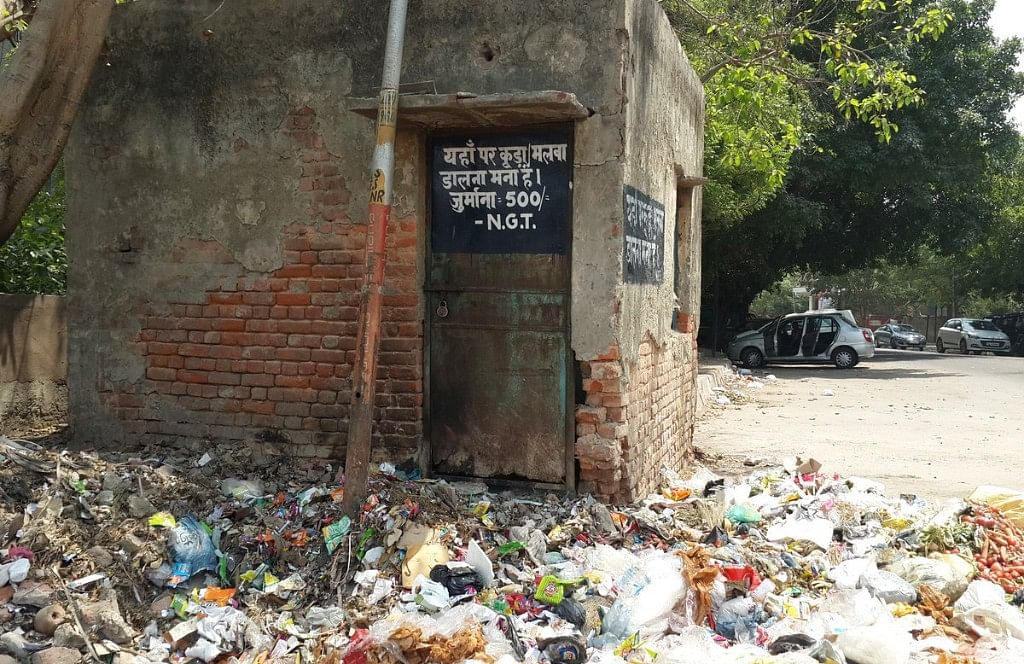

In [6]:
Image.fromarray(image_list_dirty[1])

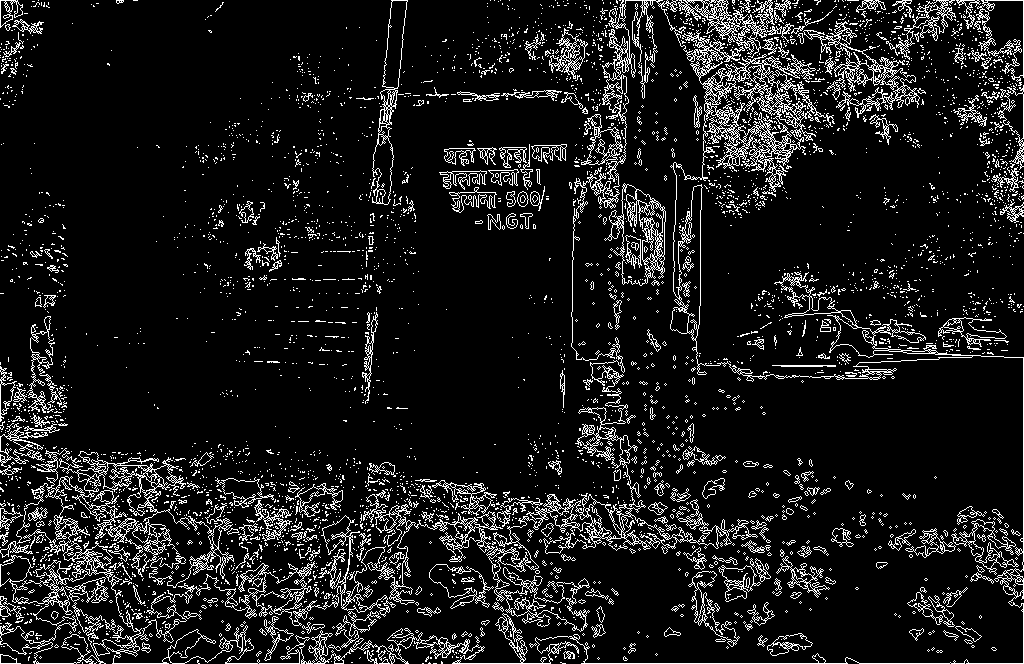

In [7]:
Image.fromarray(f1(image_list_dirty[1]))

In [8]:
def local1_Otsu(img): #img in grey
    min_ = img.min()
    max_ = img.max()
    
    histSize = max_ - min_ + 1
    hist = [0] * histSize
    
    for i in img:
        for val in i:
            hist[val - min_] += 1
    
    m = 0
    n = 0
    
    for t in range(max_ - min_ + 1):
        m += t * hist[t]
        n += hist[t]
 
    maxSigma = -1
    threshold = 0
 
    alpha1 = 0
    beta1 = 0
    
    for t in range(max_ - min_):
        alpha1 += t * hist[t]
        beta1 += hist[t]

    w1 = float(beta1) / n
 
    a = float(alpha1) / beta1 - float(m - alpha1) / (n - beta1);
    
    sigma = w1 * (1 - w1) * a * a;
 
    if sigma > maxSigma:    
        maxSigma = sigma
        threshold = t

    threshold += min_
    return threshold


In [9]:
def local1(img): # in gray
    mean_img = Image.fromarray(img).convert('L')
    ret2, th2 = cv2.threshold(np.array(mean_img), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return th2

In [10]:
def local2(img): # in gray
    mean_img = Image.fromarray(img).convert('L')
    ret2, th2 = cv2.threshold(np.array(mean_img), 0, 255, cv2.THRESH_TRIANGLE)
    return th2

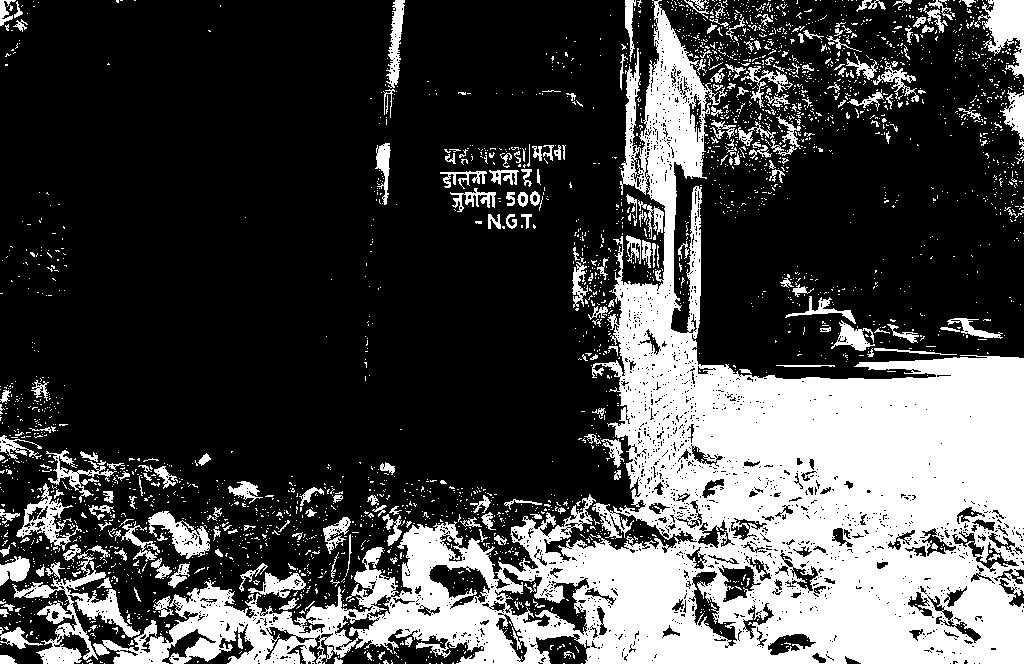

In [11]:
Image.fromarray(local1(image_list_dirty[1]))

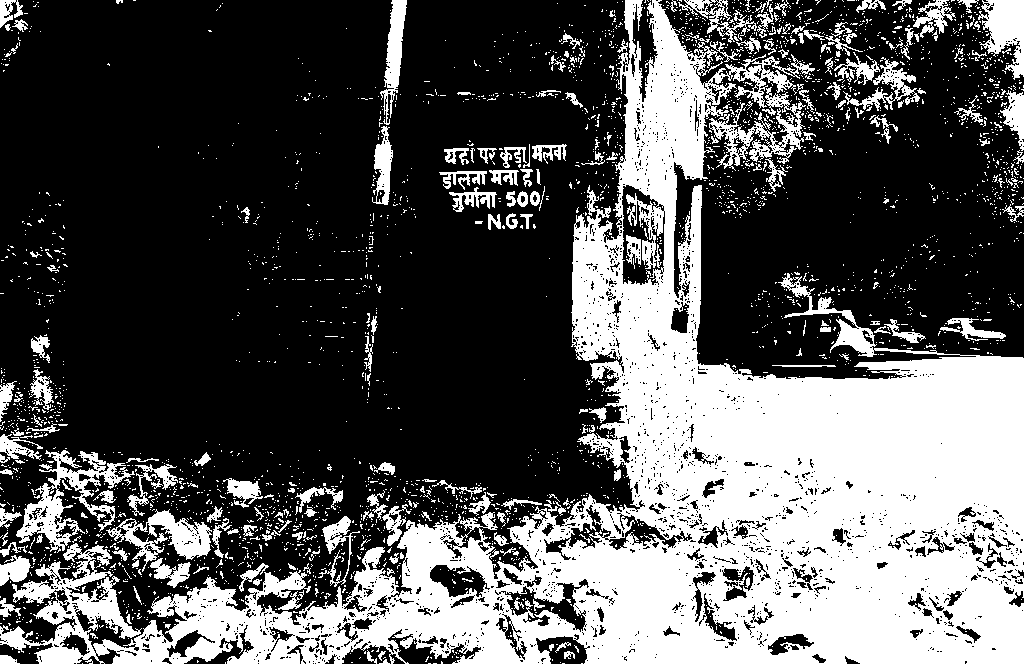

In [12]:
Image.fromarray(local2(image_list_dirty[1]))

In [13]:
def adaptive1(img):
    mean_img = Image.fromarray(img).convert('L')
    arr2 = cv2.adaptiveThreshold(np.array(mean_img), 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 5, 20)
    return arr2.astype(np.uint8)

In [14]:
def adaptive2(img):
    mean_img = Image.fromarray(img).convert('L')
    arr2 = cv2.adaptiveThreshold(np.array(mean_img), 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 5, 20)
    return arr2.astype(np.uint8)

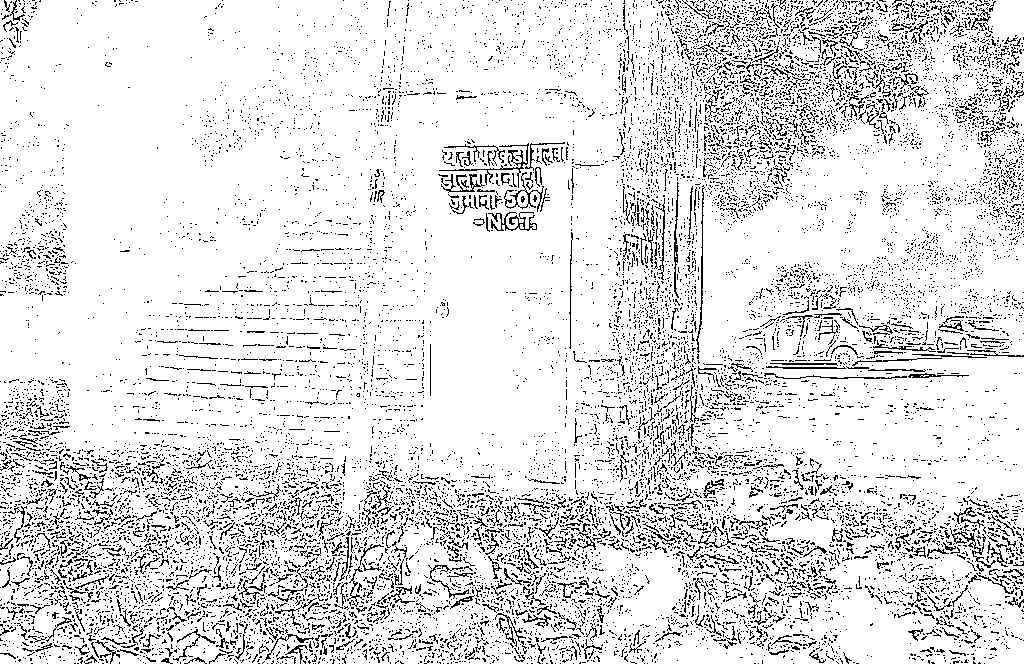

In [15]:
Image.fromarray(adaptive1(image_list_dirty[1]), mode='L')

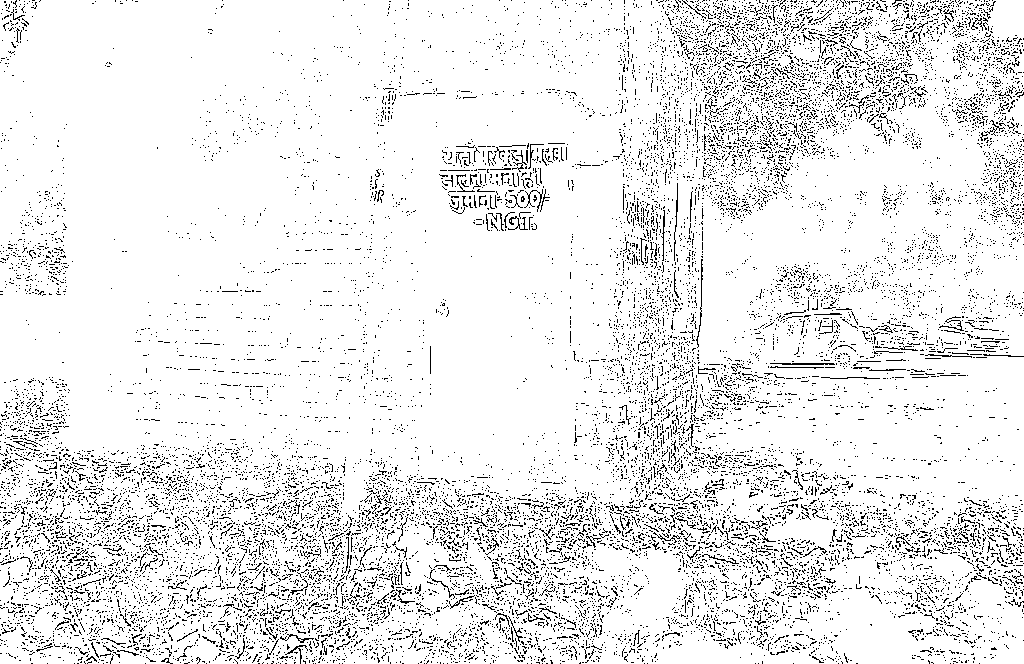

In [16]:
Image.fromarray(adaptive2(image_list_dirty[1]), mode='L')

In [17]:
from tkinter import colorchooser
from tkinter import *
from tkinter import ttk
from tkinter import messagebox as mb
from tkinter.ttk import Combobox  

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageTk
import os
from skimage import io
from math import log2, ceil

In [19]:
def digit(st):
    if len(st) > 0:
        if st[0] == '-':
            if len(st) > 1 and st[1:].isdigit():
                return True
            else:
                return False
        else:
            if st.isdigit():
                return True
            else:
                return False
    else:
        return False

In [20]:
window = Tk()  
window.title("KG Lab 2")  
window.geometry('1500x800')
'''
image_list_dirty
adaptive1
adaptive2
local1
local2
f1
'''

def show_click():
    idx = txt_idx.get()
    if not digit(idx):
        mb.showerror("Error", "Uncorrect data")
    global label
    idx = int(idx)
    typ = combo.get()
    if idx >= len(image_list_dirty):
        mb.showerror("Error", "Index out of range")
        
    if typ == 'base':
        our_img = Image.fromarray(image_list_dirty[idx]).copy()
        our_img = our_img.resize((600, 600))
        our_img = ImageTk.PhotoImage(our_img)
        label.config(image = our_img)
        label.image = our_img
    elif typ == 'f1':
        our_img = Image.fromarray(f1(image_list_dirty[idx])).copy()
        our_img = our_img.resize((600, 600))
        our_img = ImageTk.PhotoImage(our_img)
        label.config(image = our_img)
        label.image = our_img
    elif typ == 'local1':
        our_img = Image.fromarray(local1(image_list_dirty[idx])).copy()
        our_img = our_img.resize((600, 600))
        our_img = ImageTk.PhotoImage(our_img)
        label.config(image = our_img)
        label.image = our_img
    elif typ == 'local2':
        our_img = Image.fromarray(local2(image_list_dirty[idx])).copy()
        our_img = our_img.resize((600, 600))
        our_img = ImageTk.PhotoImage(our_img)
        label.config(image = our_img)
        label.image = our_img
    elif typ == 'adaptive1':
        our_img = Image.fromarray(adaptive1(image_list_dirty[idx])).copy()
        our_img = our_img.resize((600, 600))
        our_img = ImageTk.PhotoImage(our_img)
        label.config(image = our_img)
        label.image = our_img
    elif typ == 'adaptive2':
        our_img = Image.fromarray(adaptive2(image_list_dirty[idx])).copy()
        our_img = our_img.resize((600, 600))
        our_img = ImageTk.PhotoImage(our_img)
        label.config(image = our_img)
        label.image = our_img
    
    


combo = Combobox(window)  
combo['values'] = ('base', 'f1', 'local1', 'local2', 'adaptive1', 'adaptive2',)  
combo.current(0)  # установите вариант по умолчанию  
combo.grid(column=0, row=0)  

txt_idx = Entry(window, width=10)
txt_idx.grid(column=1, row=0)

btn_show = Button(window, text="Enter", command=show_click, width=15)
btn_show.grid(column=2, row=0)

first_img = Image.fromarray(image_list_dirty[0]).copy()
first_img = ImageTk.PhotoImage(first_img)

label = Label(image = first_img)
label.place(x = 40, y = 30)


window.mainloop()